# 🍬 Candy Distributor - Exploratory Data Analysis

This notebook performs EDA on the Candy Distributor sales data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Data path (relative to notebooks folder)
DATA_PATH = Path('../../DataSource')

## 1. Load Data

In [2]:
# Load all datasets
sales = pd.read_csv(DATA_PATH / 'Candy_Sales.csv')
products = pd.read_csv(DATA_PATH / 'Candy_Products.csv')
factories = pd.read_csv(DATA_PATH / 'Candy_Factories.csv')
targets = pd.read_csv(DATA_PATH / 'Candy_Targets.csv')
geo = pd.read_csv(DATA_PATH / 'uszips.csv')

print(f"Sales: {sales.shape}")
print(f"Products: {products.shape}")
print(f"Factories: {factories.shape}")
print(f"Targets: {targets.shape}")
print(f"Geography: {geo.shape}")

Sales: (10194, 18)
Products: (15, 6)
Factories: (5, 3)
Targets: (3, 2)
Geography: (33787, 18)


In [3]:
# Preview sales data
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-FUD-51000,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-MIL-31000,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,3396,US-2022-121391-CHO-MIL-31000,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28


In [4]:
# Data types and info
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          10194 non-null  int64  
 1   Order ID        10194 non-null  object 
 2   Order Date      10194 non-null  object 
 3   Ship Date       10194 non-null  object 
 4   Ship Mode       10194 non-null  object 
 5   Customer ID     10194 non-null  int64  
 6   Country/Region  10194 non-null  object 
 7   City            10194 non-null  object 
 8   State/Province  10194 non-null  object 
 9   Postal Code     10194 non-null  object 
 10  Division        10194 non-null  object 
 11  Region          10194 non-null  object 
 12  Product ID      10194 non-null  object 
 13  Product Name    10194 non-null  object 
 14  Sales           10194 non-null  float64
 15  Units           10194 non-null  int64  
 16  Gross Profit    10194 non-null  float64
 17  Cost            10194 non-null 

## 2. Data Cleaning

In [5]:
# Convert date columns
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Ship Date'] = pd.to_datetime(sales['Ship Date'])

# Extract date components
sales['Year'] = sales['Order Date'].dt.year
sales['Month'] = sales['Order Date'].dt.month
sales['Quarter'] = sales['Order Date'].dt.quarter
sales['DayOfWeek'] = sales['Order Date'].dt.dayofweek
sales['YearMonth'] = sales['Order Date'].dt.to_period('M').astype(str)

# Calculate shipping days
sales['Ship Days'] = (sales['Ship Date'] - sales['Order Date']).dt.days

print("Date range:", sales['Order Date'].min(), "to", sales['Order Date'].max())

Date range: 2021-01-03 00:00:00 to 2024-12-30 00:00:00


In [6]:
# Check for missing values
sales.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Division          0
Region            0
Product ID        0
Product Name      0
Sales             0
Units             0
Gross Profit      0
Cost              0
Year              0
Month             0
Quarter           0
DayOfWeek         0
YearMonth         0
Ship Days         0
dtype: int64

## 3. Summary Statistics

In [7]:
# Key metrics
print("=" * 50)
print("KEY BUSINESS METRICS")
print("=" * 50)
print(f"Total Sales: ${sales['Sales'].sum():,.2f}")
print(f"Total Cost: ${sales['Cost'].sum():,.2f}")
print(f"Gross Profit: ${sales['Gross Profit'].sum():,.2f}")
print(f"Gross Margin: {sales['Gross Profit'].sum() / sales['Sales'].sum() * 100:.1f}%")
print(f"Total Units: {sales['Units'].sum():,}")
print(f"Total Orders: {sales['Order ID'].nunique():,}")
print(f"Unique Customers: {sales['Customer ID'].nunique():,}")
print(f"Avg Order Value: ${sales.groupby('Order ID')['Sales'].sum().mean():.2f}")

KEY BUSINESS METRICS
Total Sales: $141,783.63
Total Cost: $48,340.83
Gross Profit: $93,442.80
Gross Margin: 65.9%
Total Units: 38,654
Total Orders: 8,549
Unique Customers: 5,044
Avg Order Value: $16.58


In [8]:
# Descriptive statistics
sales[['Sales', 'Units', 'Cost', 'Gross Profit']].describe()

,Sales,Units,Cost,Gross Profit
count,10194.000000,10194.000000,10194.000000,10194.000000
mean,13.908537,3.791838,4.742087,9.166451
std,11.341020,2.228317,5.061647,6.643740
min,1.250000,1.000000,0.600000,0.250000
25%,7.200000,2.000000,2.400000,4.900000
50%,10.800000,3.000000,3.600000,7.470000
75%,18.000000,5.000000,5.700000,12.250000
max,260.000000,14.000000,130.000000,130.000000


## 4. Time Series Analysis

In [9]:
# Monthly sales trend
monthly = sales.groupby('YearMonth').agg({
    'Sales': 'sum',
    'Units': 'sum',
    'Order ID': 'nunique'
}).reset_index()
monthly.columns = ['YearMonth', 'Sales', 'Units', 'Orders']

fig = px.line(monthly, x='YearMonth', y='Sales', 
              title='Monthly Sales Trend',
              labels={'Sales': 'Sales ($)', 'YearMonth': 'Month'})
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [10]:
# Year over Year comparison
yearly = sales.groupby('Year').agg({
    'Sales': 'sum',
    'Gross Profit': 'sum',
    'Units': 'sum',
    'Order ID': 'nunique'
}).reset_index()

yearly['YoY Growth'] = yearly['Sales'].pct_change() * 100
yearly['Margin %'] = yearly['Gross Profit'] / yearly['Sales'] * 100

print(yearly.to_string(index=False))

 Year    Sales  Gross Profit  Units  Order ID  YoY Growth  Margin %
 2021 28953.55      18942.37   7813      1718         NaN 65.423307
 2022 29002.65      19209.06   8086      1764    0.169582 66.232086
 2023 36859.32      24340.58  10018      2223   27.089490 66.036433
 2024 46968.11      30950.79  12737      2844   27.425330 65.897457


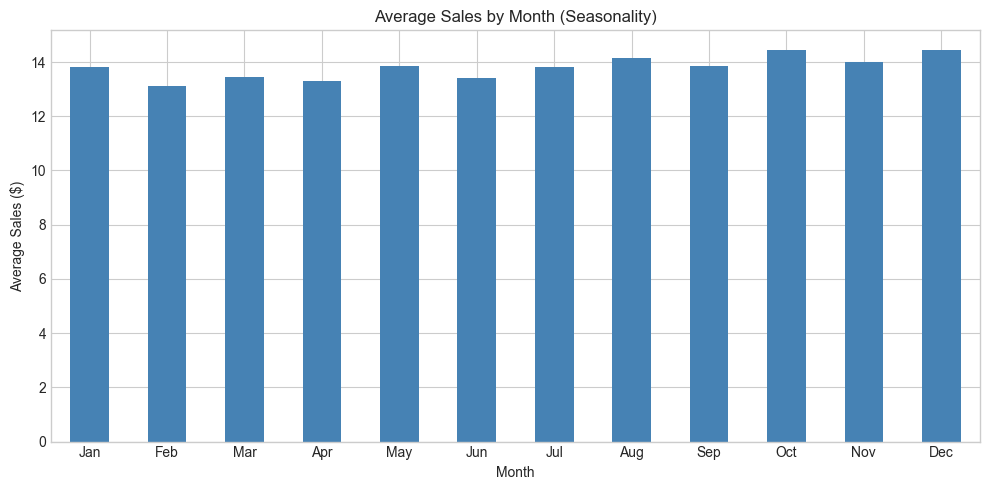

In [11]:
# Seasonality - Monthly pattern
monthly_pattern = sales.groupby('Month')['Sales'].mean()

fig, ax = plt.subplots(figsize=(10, 5))
monthly_pattern.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Average Sales by Month (Seasonality)')
ax.set_xlabel('Month')
ax.set_ylabel('Average Sales ($)')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.tight_layout()
plt.show()

## 5. Product Analysis

In [12]:
# Sales by Division (using sales table Division column)
div_sales = sales.groupby('Division').agg({
    'Sales': 'sum',
    'Gross Profit': 'sum',
    'Units': 'sum'
}).reset_index()
div_sales['Margin %'] = div_sales['Gross Profit'] / div_sales['Sales'] * 100
div_sales = div_sales.sort_values('Sales', ascending=False)

print("Sales by Division:")
print(div_sales.to_string(index=False))

Sales by Division:
 Division     Sales  Gross Profit  Units  Margin %
Chocolate 131692.90      88824.62  37275 67.448298
    Other   9663.25       4333.45   1242 44.844643
    Sugar    427.48        284.73    137 66.606625


In [13]:
# Top 10 Products
top_products = sales.groupby('Product Name').agg({
    'Sales': 'sum',
    'Gross Profit': 'sum',
    'Units': 'sum'
}).sort_values('Sales', ascending=False).head(10)

fig = px.bar(top_products.reset_index(), x='Product Name', y='Sales',
             title='Top 10 Products by Sales',
             color='Gross Profit', color_continuous_scale='Greens')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## 6. Geographic Analysis

In [14]:
# Sales by State
state_sales = sales.groupby('State/Province').agg({
    'Sales': 'sum',
    'Order ID': 'nunique',
    'Customer ID': 'nunique'
}).sort_values('Sales', ascending=False).head(10)
state_sales.columns = ['Sales', 'Orders', 'Customers']

print("Top 10 States:")
print(state_sales.to_string())

Top 10 States:
                   Sales  Orders  Customers
State/Province                             
California      27917.40    1686       1021
New York        15541.03     942        562
Texas           13416.09     833        487
Pennsylvania     8027.03     487        288
Washington       6921.15     432        256
Illinois         6898.96     433        276
Ohio             6768.95     392        236
Florida          4804.02     319        200
Arizona          3587.55     190        108
North Carolina   3450.86     216        136


In [15]:
# Sales by Region
region_sales = sales.groupby('Region').agg({
    'Sales': 'sum',
    'Gross Profit': 'sum'
}).reset_index()

fig = px.pie(region_sales, values='Sales', names='Region',
             title='Sales Distribution by Region')
fig.show()

## 7. Customer Analysis

In [16]:
# Customer metrics
customer_stats = sales.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Order ID': 'nunique',
    'Units': 'sum'
}).reset_index()
customer_stats.columns = ['Customer ID', 'Total Sales', 'Orders', 'Units']

print("Customer Statistics:")
print(customer_stats[['Total Sales', 'Orders', 'Units']].describe())

Customer Statistics:
       Total Sales       Orders        Units
count  5044.000000  5044.000000  5044.000000
mean     28.109364     1.694885     7.663362
std      27.412460     0.999844     6.618172
min       1.250000     1.000000     1.000000
25%      10.800000     1.000000     3.000000
50%      20.900000     1.000000     6.000000
75%      35.750000     2.000000    10.000000
max     454.400000    15.000000   110.000000


In [17]:
# Customer segments by sales
customer_stats['Segment'] = pd.qcut(customer_stats['Total Sales'], q=4, 
                                     labels=['Low', 'Medium', 'High', 'VIP'])

segment_summary = customer_stats.groupby('Segment').agg({
    'Customer ID': 'count',
    'Total Sales': 'sum',
    'Orders': 'mean'
}).reset_index()
segment_summary.columns = ['Segment', 'Customers', 'Total Sales', 'Avg Orders']
segment_summary['% of Sales'] = segment_summary['Total Sales'] / segment_summary['Total Sales'].sum() * 100

print("\nCustomer Segments:")
print(segment_summary.to_string(index=False))


Customer Segments:
Segment  Customers  Total Sales  Avg Orders  % of Sales
    Low       1375     10464.04    1.025455    7.380288
 Medium       1153     18221.67    1.306158   12.851745
   High       1259     34363.05    1.712470   24.236261
    VIP       1257     78734.87    2.766110   55.531707


C:\Users\benit\AppData\Local\Temp\ipykernel_34652\3455202572.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## 8. Operational Analysis

In [18]:
# Shipping analysis
ship_analysis = sales.groupby('Ship Mode').agg({
    'Sales': 'sum',
    'Order ID': 'nunique',
    'Ship Days': 'mean'
}).sort_values('Sales', ascending=False)
ship_analysis.columns = ['Sales', 'Orders', 'Avg Ship Days']

print("Shipping Mode Analysis:")
print(ship_analysis.to_string())

Shipping Mode Analysis:
                   Sales  Orders  Avg Ship Days
Ship Mode                                      
Standard Class  85490.35    5142    2004.996405
Second Class    27860.22    1653    2003.237494
First Class     21319.39    1312    2002.182171
Same Day         7113.67     442    2000.043876


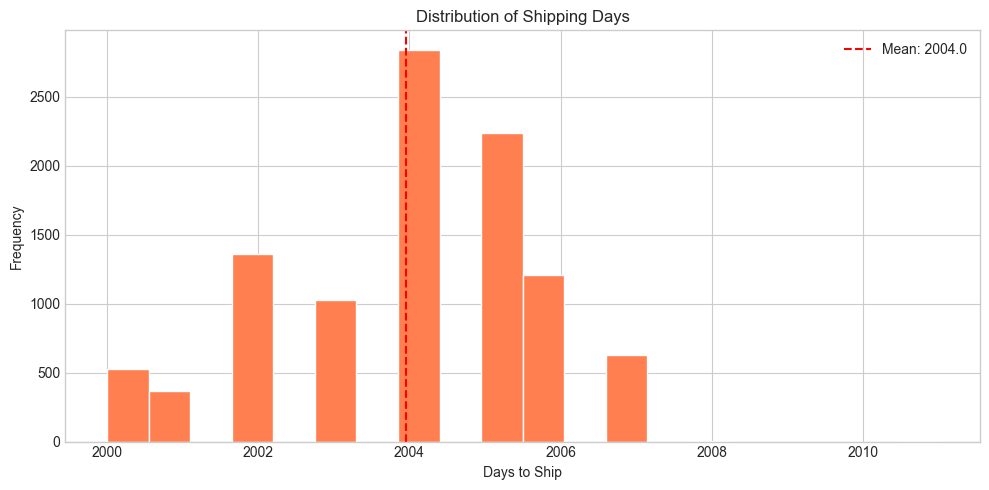

In [19]:
# Shipping days distribution
fig, ax = plt.subplots(figsize=(10, 5))
sales['Ship Days'].hist(bins=20, ax=ax, color='coral', edgecolor='white')
ax.set_title('Distribution of Shipping Days')
ax.set_xlabel('Days to Ship')
ax.set_ylabel('Frequency')
ax.axvline(sales['Ship Days'].mean(), color='red', linestyle='--', label=f'Mean: {sales["Ship Days"].mean():.1f}')
ax.legend()
plt.tight_layout()
plt.show()

## 9. Correlation Analysis

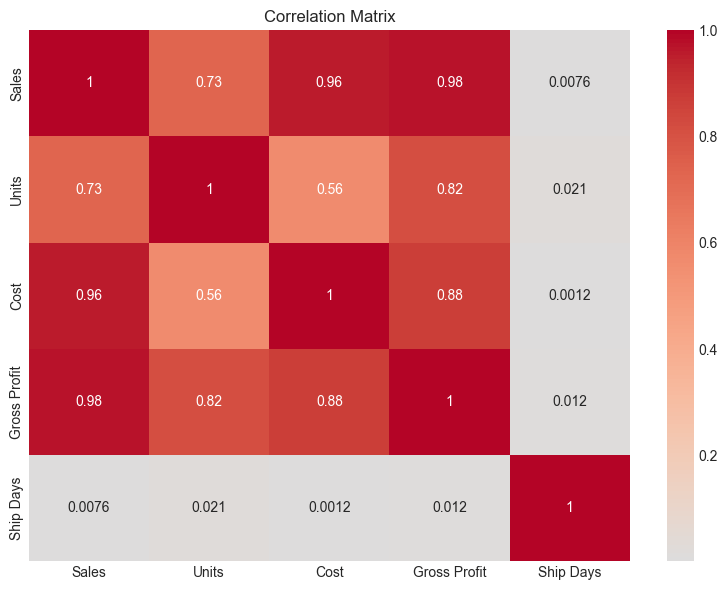

In [20]:
# Correlation matrix
corr_cols = ['Sales', 'Units', 'Cost', 'Gross Profit', 'Ship Days']
corr_matrix = sales[corr_cols].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax)
ax.set_title('Correlation Matrix')
plt.tight_layout()
plt.show()

## 10. Key Insights Summary

In [21]:
print("="*60)
print("KEY INSIGHTS SUMMARY")
print("="*60)
print("\n📈 GROWTH:")
print(f"  - Total Revenue: ${sales['Sales'].sum():,.0f}")
print(f"  - Strong YoY growth: 2023 (+27%), 2024 (+27%)")
print(f"  - Consistent ~66% gross margin")

print("\n🍫 PRODUCTS:")
print(f"  - Chocolate dominates: 93% of revenue")
print(f"  - Top product: Wonka Bar - Triple Dazzle Caramel")
print(f"  - Chocolate has highest margin (~67%)")

print("\n📍 GEOGRAPHY:")
print(f"  - California is #1 market (20% of sales)")
print(f"  - Top 3 states = 40% of revenue")

print("\n📅 SEASONALITY:")
print(f"  - Q4 is strongest (holiday season)")
print(f"  - February is typically lowest")

print("\n🚚 OPERATIONS:")
print(f"  - Standard Class: 60% of orders")
print(f"  - Avg shipping: {sales['Ship Days'].mean():.0f} days")

print("\n💡 RECOMMENDATIONS:")
print("  1. Focus marketing on Q4 to maximize seasonal peak")
print("  2. Expand presence in California and NY")
print("  3. Consider expanding Sugar/Other divisions")
print("  4. Analyze low-demand periods (Feb) for promotions")

KEY INSIGHTS SUMMARY

📈 GROWTH:
  - Total Revenue: $141,784
  - Strong YoY growth: 2023 (+27%), 2024 (+27%)
  - Consistent ~66% gross margin

🍫 PRODUCTS:
  - Chocolate dominates: 93% of revenue
  - Top product: Wonka Bar - Triple Dazzle Caramel
  - Chocolate has highest margin (~67%)

📍 GEOGRAPHY:
  - California is #1 market (20% of sales)
  - Top 3 states = 40% of revenue

📅 SEASONALITY:
  - Q4 is strongest (holiday season)
  - February is typically lowest

🚚 OPERATIONS:
  - Standard Class: 60% of orders
  - Avg shipping: 2004 days

💡 RECOMMENDATIONS:
  1. Focus marketing on Q4 to maximize seasonal peak
  2. Expand presence in California and NY
  3. Consider expanding Sugar/Other divisions
  4. Analyze low-demand periods (Feb) for promotions
